## Cora Dataset
Cora is a scientific paper citation network of 2708 publications, where each node is a paper and each connection is a reference. Each publication is descried as a binary vector of 1433 unique words (bag of words). The goal is to clssify the category the paper belongs to.

<img src="CoraBalloons.png" atl="cora">
<!-- <img src="cora.png" atl="cora2"> -->

In [1]:
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import degree
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx 
from torch_geometric.utils import to_networkx
import pandas as pd
import numpy as np

## Exploring Graph Data

In [2]:
# loading cora dataset
dataset = Planetoid(root=".", name="Cora")
# access the first graph
data = dataset[0]

print(f'Dataset: {dataset}')
print(f'-------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'{data}')
print(f'Number of nodes: {data.x.shape[0]}') # using shape to check dimenstion row is nodes and col is features
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')


print(f'Graph:')
print(f'-------------------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')


print(f'-------------------')
print(f'Tensor:')
print(f'Features of first 3 nodes (publication papers)\n {data.x[:3]}')
print(f'First 5 edges\n {data.edge_index[:, :5]}')
print(f'label of 5 node\n {data.y[:5]}')


Dataset: Cora()
-------------------
Number of graphs: 1
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of features: 1433
Number of classes: 7
Graph:
-------------------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False
-------------------
Tensor:
Features of first 3 nodes (publication papers)
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
First 5 edges
 tensor([[   0,    0,    0,    1,    1],
        [ 633, 1862, 2582,    2,  652]])
label of 5 node
 tensor([3, 4, 4, 0, 3])


## Inspect data as tabular data

In [3]:
df = pd.DataFrame(data.x.numpy())
df['label'] = pd.DataFrame(data.y)
df

,0,1,2,3,4,5,6,7,8,9,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


## Calculating node degrees

- The high degrees nodes (important nodes) show they have more connection to other node which is papers. The papers has many connection also means it being cited by many other papers as well
- Average degree is 3.9 is relatively low
- Use Cumulative Distribution Function to show the cumulative frequency of nodes if a node degree is less than or equal to a certain nodes degrees 

Average node degree: 3.90
Connection pairs:


,0
0,3
1,3
2,5
3,1
4,5
...,...
2703,1
2704,1
2705,1
2706,4


,count,mean,std,min,25%,50%,75%,max
0,2708.0,3.9,5.23,1.0,2.0,3.0,5.0,168.0


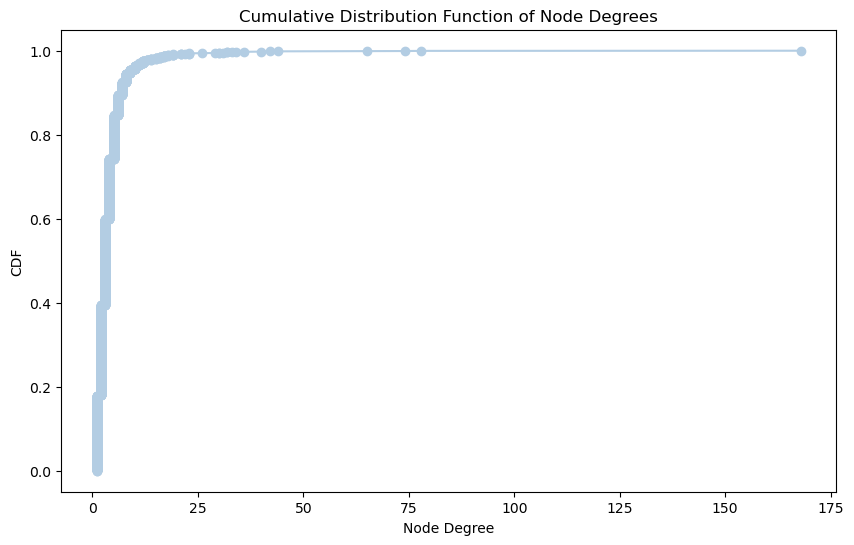

In [4]:

average_node_degree = data.num_edges / data.num_nodes
print(f"Average node degree: {average_node_degree:.2f}")


G = to_networkx(data, to_undirected=True)
degrees = []
for i, node in G.degree():
    degrees.append(node)
# Calculate the CDF of node degrees
sorted_degrees = np.sort(degrees)  # Sort the degrees in ascending order
cdf = np.arange(1, len(sorted_degrees)+1) / len(sorted_degrees)  # Calculate the CDF 

print(f"Connection pairs:")
display(pd.DataFrame(pd.Series(degrees)))
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))


# Plotting the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_degrees, cdf, marker='o', linestyle='-', color='#b3cde3')
plt.xlabel('Node Degree')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Node Degrees')
plt.show()


## Visualizing the Network - NetworkX

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])


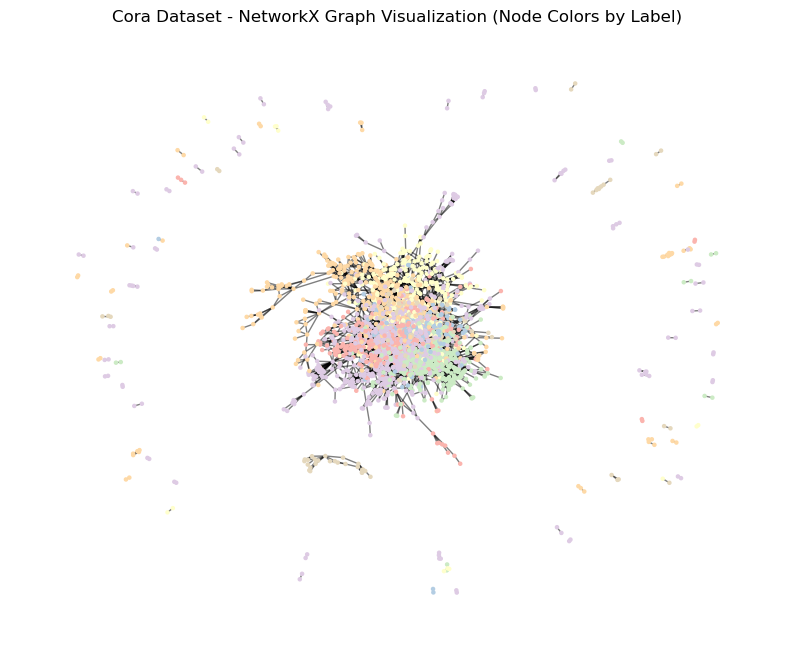

In [16]:

# tranpose = data.edge_index.T
# print(tranpose)

adj = data.edge_index
print(adj)
features = data.x
# print(features)
labels = data.y
# print(labels)


node_color = []
colorlist = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6', '#ffffcc', '#e5d8bd']
for label in labels:
    node_color.append(colorlist[label])

# Now, draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  

# Draw nodes with the color in node_color list
nx.draw_networkx_nodes(G, pos, node_size=5, node_color=node_color)

# # Use a lighter alpha for edges
nx.draw_networkx_edges(G, pos, width=1, alpha = 0.5)  

plt.title("Cora Dataset - NetworkX Graph Visualization (Node Colors by Label)")
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()


## Vanila neural nets

In [6]:
class_labels = [
    'Case Based',
    'Genetic Algorithms',
    'Neural Networks',
    'Probabilistic Methods',
    'Reinforcement Learning',
    'Rule Learning',
    'Theory'
]

In [7]:
import torch
from torch.nn import Linear
import torch.nn.functional as F

# Define accuracy metric as the number of correctly predicted results / total numbe of samples
def accuracy(y_pred, y_true):
    return torch.sum(y_pred == y_true) / len(y_true)

# The artificial neural netwrok without topological data
class MLP(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.linear1 = Linear(dim_in, dim_h) # input layer -> hidden layer
        self.linear2 = Linear(dim_h, dim_out) # hidden layer -> output layer

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        return F.log_softmax(x, dim=1) # Softmax layer to convert output to probability between 0 and 1
    
    # Training function
    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss() # Use cross entropy loss as loss function
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4) # Use Adam optimizer

        # main training loop
        self.train() # Set the model in tranining mode
        for epoch in range(epochs+1):
            optimizer.zero_grad() # Clear the gradients
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask]) # calculate the loss between output and ground truth
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward() # Back propogate the loss
            optimizer.step() # Gradient descent

            # Print the stats every 20 epochs
            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [8]:
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)

MLP(
  (linear1): Linear(in_features=1433, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=7, bias=True)
)


In [9]:
mlp.fit(data, epochs=100)

Epoch   0 | Train Loss: 1.954 | Train Acc: 14.29% | Val Loss: 1.93 | Val Acc: 12.20%
Epoch  20 | Train Loss: 0.083 | Train Acc: 100.00% | Val Loss: 1.60 | Val Acc: 48.40%
Epoch  40 | Train Loss: 0.010 | Train Acc: 100.00% | Val Loss: 1.62 | Val Acc: 49.00%
Epoch  60 | Train Loss: 0.006 | Train Acc: 100.00% | Val Loss: 1.63 | Val Acc: 48.20%
Epoch  80 | Train Loss: 0.007 | Train Acc: 100.00% | Val Loss: 1.53 | Val Acc: 49.40%
Epoch 100 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.44 | Val Acc: 51.20%


In [10]:
acc = mlp.test(data)
print(f'MLP test accuracy: {acc*100:.2f}%')

MLP test accuracy: 52.80%
